# Questions

1.	Perform principal components analysis to understand the underlying data structure<br>
2.	Create a scree plot to determine how much variation each principal component captures from the data<br>
3.	It is important to check for outliers because they can significantly influence the results. Use ‘Mahalanobis distances’  in your data and plot them to observe the outliers<br>
4.	Perform normalization on the given dataset and perform PCA and compare with the results which you got from PCA results which done using raw data.<br>
5.	Check the proportion of variances of the last two components in the result table. Are they significant when compared to other principle components?<br>


In [60]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#Read the file
df = pd.read_csv("./6501242_K8AQ946C.csv")

In [23]:
df.shape

(291, 5)

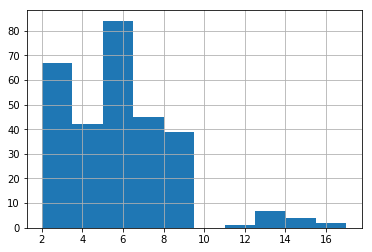

In [26]:
df.School.hist()

In [4]:
df.head(10)

,Pop,School,Employ,Health,Home
0,5.935,14.2,2.265,2.27,2.91
1,1.523,13.1,0.597,0.75,2.62
2,2.599,12.7,1.237,1.11,1.72
3,4.009,15.2,1.649,0.81,3.02
4,4.687,14.7,2.312,2.50,2.22
5,8.044,15.6,3.641,4.51,2.36
6,2.766,13.3,1.244,1.03,1.97
7,6.538,17.0,2.618,2.39,1.85
8,6.451,12.9,3.147,5.52,2.01
9,3.314,12.2,1.606,2.18,1.82


### 1) Perform principal components analysis to understand the underlying data structure

Step 1

In [5]:
from sklearn.preprocessing import StandardScaler


In [27]:
# Separating out the features
x = df[:].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)

PCA Projection to 2D

In [9]:
from sklearn.decomposition import PCA


In [28]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Visualize 2D Projection

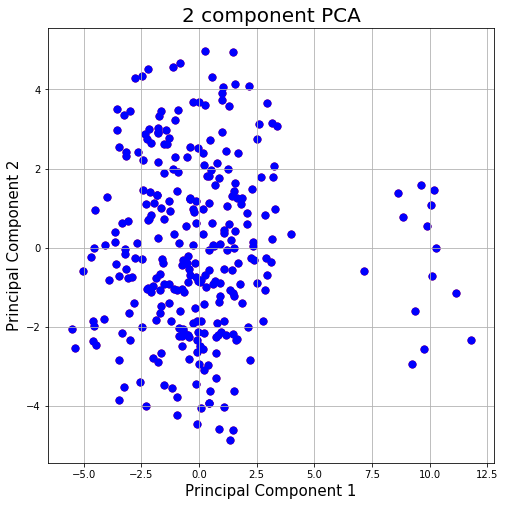

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A','B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , c = color
               , s = 50)
#ax.legend(targets)
ax.grid()

In [22]:
pca.explained_variance_ratio_

array([0.31585225, 0.21073489])

We can observe from the graph that, even though there's clear separation between the components, there's unequal distribution of data points. 

### 2) Create a scree plot to determine how much variation each principal component captures from the data

In [56]:
A=df.values

C:\Users\sushrut.t\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


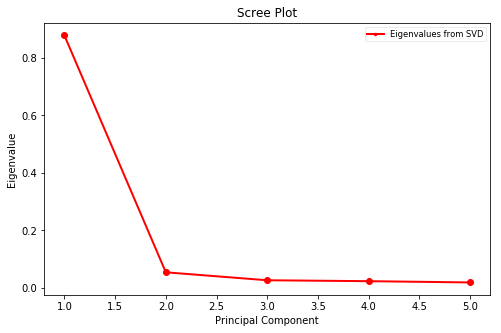

In [57]:

U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

num_obs = df.shape[0]
num_vars = df.shape[1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

### 3 )It is important to check for outliers because they can significantly influence the results. Use ‘Mahalanobis distances’ in your data and plot them to observe the outliers

In [58]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [61]:
df_x = df[['Pop','School','Employ','Health','Home']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['Pop','School','Employ','Health','Home']])
df_x.head()

,Pop,School,Employ,Health,Home,mahala
0,5.935,14.2,2.265,2.27,2.91,11.837429
1,1.523,13.1,0.597,0.75,2.62,14.260292
2,2.599,12.7,1.237,1.11,1.72,11.823173
3,4.009,15.2,1.649,0.81,3.02,14.943583
4,4.687,14.7,2.312,2.50,2.22,12.632165


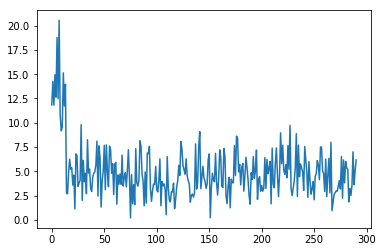

In [69]:
df_x["mahala"].plot(kind='line')

We can see outliers in the data with the help of Mahalanobis distances

### 4) Perform normalization on the given dataset and perform PCA and compare with the results which you got from PCA results which done using raw data.

In [71]:
df.head()

,Pop,School,Employ,Health,Home
0,5.935,14.2,2.265,2.27,2.91
1,1.523,13.1,0.597,0.75,2.62
2,2.599,12.7,1.237,1.11,1.72
3,4.009,15.2,1.649,0.81,3.02
4,4.687,14.7,2.312,2.50,2.22


In [74]:
from sklearn import preprocessing

In [75]:
x = df[:].values

# normalize the data attributes
x = preprocessing.normalize(x)

# Standardizing the features
#x = StandardScaler().fit_transform(x)

PCA projections to 2D

In [76]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Visualize

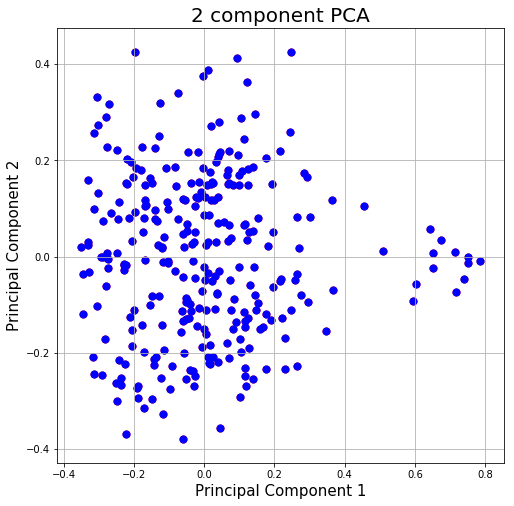

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A','B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , c = color
               , s = 50)
#ax.legend(targets)
ax.grid()

After normalizing the dataset, the values of two componenets got slightly changed and smaller cluster has less data points.

### 5) Check the proportion of variances of the last two components in the result table. Are they significant when compared to other principle components?

In [91]:
x = df[:].values

# normalize the data attributes
x = preprocessing.normalize(x)

In [92]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4'])

In [93]:
principalDf.head()

,PC1,PC2,PC3,PC4
0,0.602194,-0.057768,0.130847,0.010154
1,0.785441,-0.009815,-0.057682,-0.031414
2,0.749925,0.000205,0.031737,0.029127
3,0.717190,-0.074458,0.033599,0.010279
4,0.650246,0.007399,0.095242,0.037891


In [96]:
pca.explained_variance_ratio_

array([0.3855736 , 0.22949757, 0.20207717, 0.16508513])

In [97]:
pca.explained_variance_ratio_.sum()

0.982233471222456

**Last two components are not signifiant compared to first two components.**